In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafikler daha şık görünsün diye ayar
sns.set(style="whitegrid")

In [2]:
import pandas as pd
import os

dosya_yolu = os.path.expanduser("~/Desktop/AktüeryaAnalizVerileri/insurance.csv")

# 1. Veriyi Oku
print(f"Veri şu adresten okunuyor: {dosya_yolu}")
data = pd.read_csv(dosya_yolu)

# 2. İlk Bakış: Veri neye benziyor?
print("\n--- Veri Setinden İlk 5 Satır ---")
print(data.head())

# 3. Aktüeryal Bakış: "Saf Risk Primi" (Pure Premium) Hesabı
average_claim = data['charges'].mean()
print(f"\nOrtalama Hasar (Saf Risk Primi): {average_claim:.2f} $")

# 4. Risk Analizi: Standart Sapma
risk_volatility = data['charges'].std()
print(f"Risk Oynaklığı (Standart Sapma): {risk_volatility:.2f} $")

Veri şu adresten okunuyor: /Users/includeseysi/Desktop/AktüeryaAnalizVerileri/insurance.csv

--- Veri Setinden İlk 5 Satır ---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Ortalama Hasar (Saf Risk Primi): 13270.42 $
Risk Oynaklığı (Standart Sapma): 12110.01 $


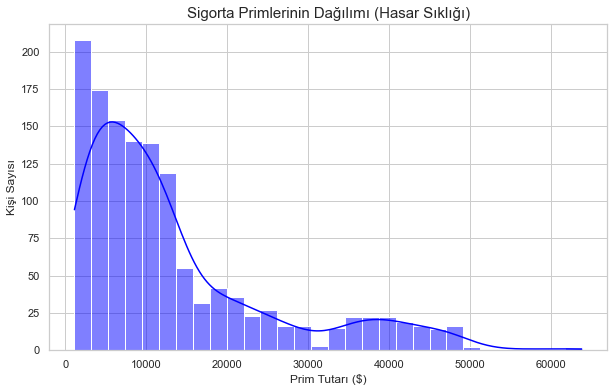

In [3]:
# 5. Görselleştirme: Hasar Dağılımı (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], kde=True, color="blue")
plt.title('Sigorta Primlerinin Dağılımı (Hasar Sıklığı)', fontsize=15)
plt.xlabel('Prim Tutarı ($)', fontsize=12)
plt.ylabel('Kişi Sayısı', fontsize=12)
plt.show()

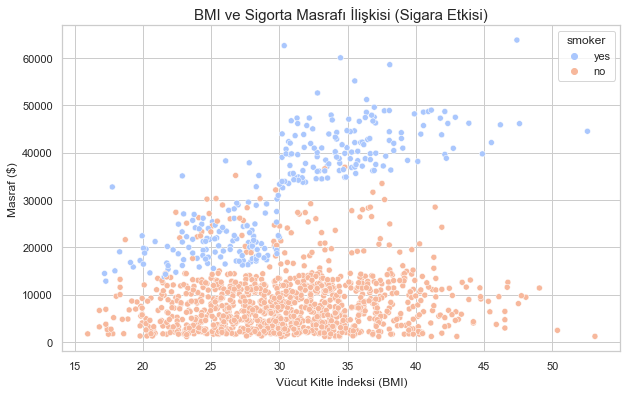

In [4]:
# 6. İlişki Analizi: BMI ve Sigorta Masrafı (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker', palette='coolwarm')
plt.title('BMI ve Sigorta Masrafı İlişkisi (Sigara Etkisi)', fontsize=15)
plt.xlabel('Vücut Kitle İndeksi (BMI)', fontsize=12)
plt.ylabel('Masraf ($)', fontsize=12)
plt.show()

In [5]:
# 7. Veri Ön İşleme: Kategorik Verileri Sayısala Çevirme
# Makine öğrenmesi ve korelasyon için metinleri (text) sayıya çevirmeliyiz.
data_encoded = data.copy()

# Sigara içen=1, içmeyen=0
data_encoded['smoker'] = data_encoded['smoker'].map({'yes': 1, 'no': 0})

# Kadın=1, Erkek=0 (veya tam tersi, sadece ayrım yapmak için)
data_encoded['sex'] = data_encoded['sex'].map({'female': 1, 'male': 0})

print("Veri sayısallaştırıldı! İlk 5 satır:")
print(data_encoded.head())

Veri sayısallaştırıldı! İlk 5 satır:
   age  sex     bmi  children  smoker     region      charges
0   19    1  27.900         0       1  southwest  16884.92400
1   18    0  33.770         1       0  southeast   1725.55230
2   28    0  33.000         3       0  southeast   4449.46200
3   33    0  22.705         0       0  northwest  21984.47061
4   32    0  28.880         0       0  northwest   3866.85520


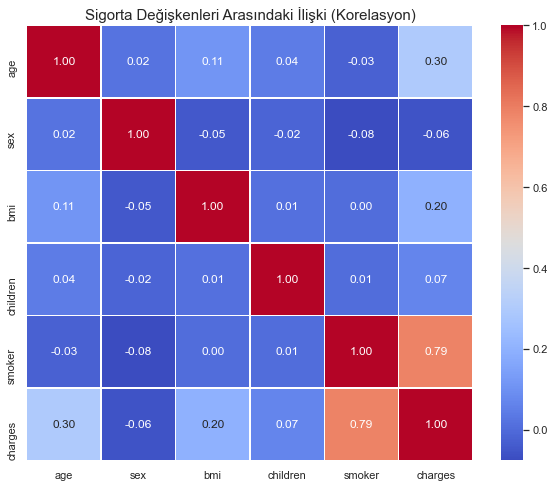

In [6]:
# 8. Korelasyon Matrisi ve Isı Haritası (Heatmap)
plt.figure(figsize=(10, 8))

# Korelasyonu hesapla (Sadece sayısal sütunlar arasında)
corr = data_encoded.corr()

# Isı haritasını çiz
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Sigorta Değişkenleri Arasındaki İlişki (Korelasyon)', fontsize=15)
plt.show()